In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline

In [25]:
data = pd.read_csv('salary_data_cleaned.csv')

In [26]:
data.head()

,rating,company_name,job_position,location,salary_range_INR,average_salary_lakhs,rating_bucket_list,job_simp,seniority,state
0,4.1,S&P Global,Data Analyst,India,3L - 6L ...,4.5,4.0,Data Analyst,na,India
1,4.2,Airtel India,Data Analyst,Gurgaon,5L - 9L ...,7.0,4.0,Data Analyst,na,Haryana
2,4.0,Barclays,Analyst - RFT Data Operations ...,New Delhi,8L - 8L ...,8.0,4.0,na,na,Delhi
3,4.2,Airtel India,Business Analyst - Messaging ...,Gurgaon,4.8L - 5.4L,5.0,4.0,Business Analyst,na,Haryana
4,3.2,Glamyo Health,Data Analyst,New Delhi,7L - 11L ...,9.0,3.0,Data Analyst,na,Delhi


In [27]:
data.columns

Index(['rating', 'company_name', 'job_position', 'location',
       'salary_range_INR', 'average_salary_lakhs', 'rating_bucket_list',
       'job_simp', 'seniority', 'state'],
      dtype='object')

In [28]:
data.describe()

,rating,average_salary_lakhs,rating_bucket_list
count,3582.000000,4975.000000,3582.000000
mean,3.994444,6.140000,3.861111
std,0.476712,1.830594,0.521970
min,3.000000,2.500000,3.000000
25%,3.800000,5.000000,3.500000
50%,4.000000,6.000000,4.000000
75%,4.200000,7.500000,4.000000
max,5.000000,9.000000,5.000000


<Axes: >

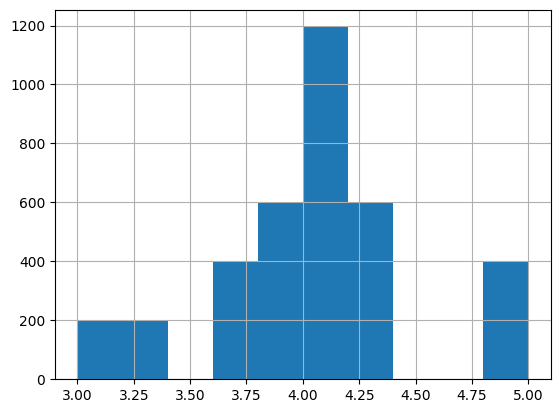

In [30]:
data.rating.hist()

<Axes: >

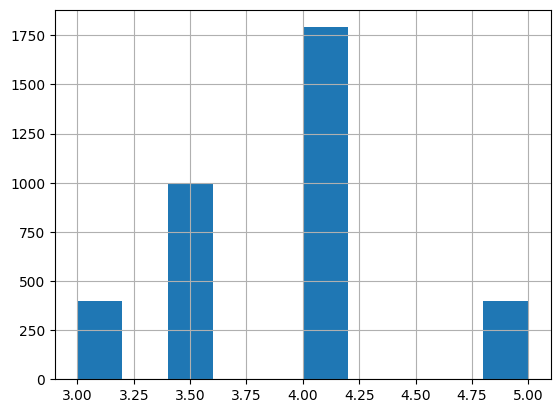

In [29]:
data.rating_bucket_list.hist()

<Axes: >

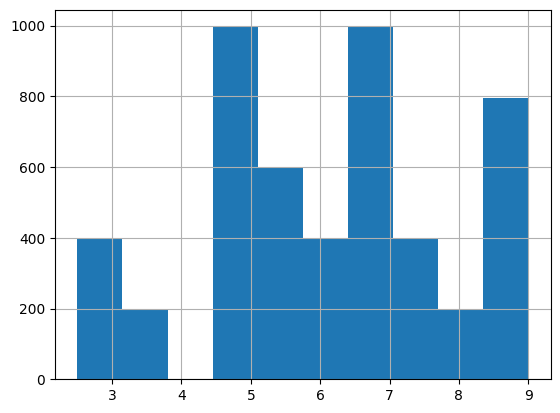

In [33]:
data.average_salary_lakhs.scatterplot()

<Axes: >

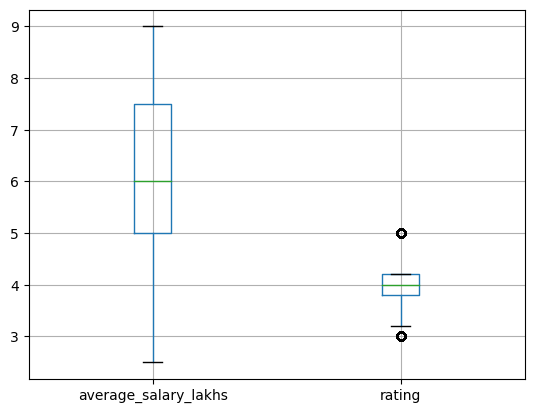

In [39]:
data.boxplot(column= ['average_salary_lakhs', 'rating'])

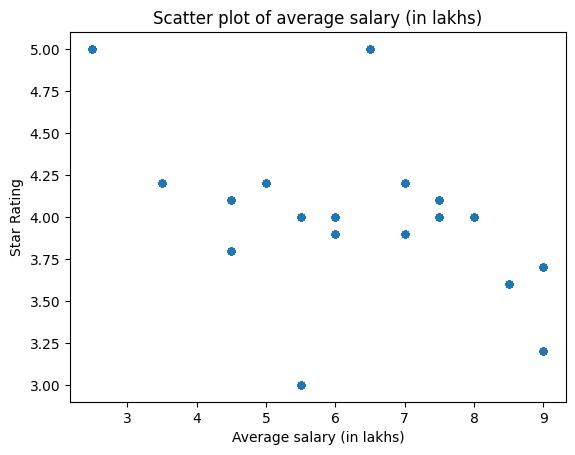

In [35]:
# Create a scatter plot of the 'average_salary_lakhs' column
data.plot.scatter(x='average_salary_lakhs', y='rating')

# Set the plot title and axis labels
plt.title('Scatter plot of average salary (in lakhs)')
plt.xlabel('Average salary (in lakhs)')
plt.ylabel('Star Rating')

# Show the plot
plt.show()


In [40]:
data[['average_salary_lakhs', 'rating', 'location', 'job_simp']].corr()

C:\Users\9ayus\AppData\Local\Temp\ipykernel_17784\863494628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['average_salary_lakhs', 'rating', 'location', 'job_simp']].corr()


,average_salary_lakhs,rating
average_salary_lakhs,1.000000,-0.458769
rating,-0.458769,1.000000


### Pivot Table

In [43]:
pd.pivot_table(data, index = 'job_simp', values = 'average_salary_lakhs').sort_values('average_salary_lakhs', ascending= False)

,average_salary_lakhs
job_simp,
na,6.750000
Data Analyst,6.590909
Product Analyst,5.000000
Business Analyst,4.875000
Data engineering,2.500000


In [46]:
pd.pivot_table(data, index = 'state', values = 'average_salary_lakhs').sort_values('average_salary_lakhs', ascending= False).round(2)

,average_salary_lakhs
state,
Karnataka,8.75
Delhi,6.88
Rajasthan,6.50
Uttar Pradesh,6.50
Maharastra,6.00
India,5.50
Remote,5.50
Haryana,5.12
Telangana,5.00


In [49]:
pd.pivot_table(data, index = ['state', 'job_simp'], values = 'average_salary_lakhs', aggfunc = 'count').sort_values('state', ascending= False).round(2)

average_salary_lakhs
state         job_simp                              
Uttar Pradesh Data Analyst                       398
Telangana     Data Analyst                       199
Remote        na                                 199
Rajasthan     Data Analyst                       199
Maharastra    Data Analyst                       199
Karnataka     na                                 398
India         Business Analyst                   199
              Data Analyst                       398
              Product Analyst                    199
Haryana       Business Analyst                   398
              Data Analyst                       199
              na                                 199
Delhi         Business Analyst                   199
              Data Analyst                       597
              na                                 796
Chandigarh    Data engineering                   199

In [51]:
# pivot for Data Analyst
pd.pivot_table(data[data.job_simp == 'Data Analyst'], index = 'state', values = 'average_salary_lakhs').sort_values('average_salary_lakhs', ascending= False).round(2)

,average_salary_lakhs
state,
Delhi,7.83
Haryana,7.00
Rajasthan,6.50
Uttar Pradesh,6.50
Maharastra,6.00
India,5.75
Telangana,5.00


In [54]:
data_pivot = data[['rating', 'company_name', 'job_position', 'average_salary_lakhs', 'location', 'state']]

In [58]:
for i in data_pivot.columns:
    print(i)
    print(pd.pivot_table(data_pivot, index= i, values= 'average_salary_lakhs'))

rating
        average_salary_lakhs
rating                      
3.0                 5.500000
3.2                 9.000000
3.6                 8.500000
3.7                 9.000000
3.8                 4.500000
3.9                 6.500000
4.0                 6.750000
4.1                 6.000000
4.2                 5.166667
5.0                 4.500000
company_name
                                                    average_salary_lakhs
company_name                                                            
                 91Squarefeet                                       5.00
                 Airtel India                                       6.00
                 ArchsystemInc                                      3.50
                 Barclays                                           6.25
                 Data Bridge Market Research   ...                  6.00
                 Deloitte                                           8.50
                 Dileep Essentials Pvt. Ltd.   .

ValueError: Grouper for 'average_salary_lakhs' not 1-dimensional